<a href="https://colab.research.google.com/github/Ahmed-Medhat1911/Sales-Analysis/blob/main/Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#@title Read the file
data=pd.read_excel("/content/fact (1).xlsx")


In [ ]:
#@title Read the data head
data.head(10)

,OrderNumber,Sales Channel,OrderDate,Sales Team,Customer Name,City,STATE,REGION,Product,Order Quantity,Discount Applied,Unit Price,Unit Cost,Sales,Total cost,Profit
0,SO - 000101,In-Store,2018-05-31,Joshua Bennett,Rochester Ltd,Babylon (Town),New York,Northeast,Dining Furniture,5,0.075,1963.1,1001.181,9815.5,5005.905,4809.595
1,SO - 000102,Online,2018-05-31,Paul Holmes,Pacific Ltd,Overland Park,Kansas,Midwest,Wreaths,3,0.075,3939.6,3348.660,11818.8,10045.980,1772.820
2,SO - 000103,Distributor,2018-05-31,Samuel Fowler,"3LAB, Ltd",Ann Arbor,Michigan,Midwest,Stemware,1,0.050,1775.5,781.220,1775.5,781.220,994.280
3,SO - 000104,Wholesale,2018-05-31,Carlos Miller,"Fenwal, Corp",New Haven,Connecticut,Northeast,Accessories,8,0.075,2324.9,1464.687,18599.2,11717.496,6881.704
4,SO - 000105,Distributor,2018-05-31,Joe Price,Bare,Waterbury,Connecticut,Northeast,Candles,8,0.100,1822.4,1476.144,14579.2,11809.152,2770.048
5,SO - 000106,Online,2018-05-31,Carl Nguyen,Ohio,Norman,Oklahoma,South,Cookware,5,0.050,1038.5,446.555,5192.5,2232.775,2959.725
6,SO - 000107,In-Store,2018-05-31,Jonathan Hawkins,Linde,Chandler,Arizona,West,Bathroom Furniture,4,0.150,1192.6,536.670,4770.4,2146.680,2623.720
7,SO - 000108,In-Store,2018-05-31,Joshua Bennett,Ei,Cleveland,Ohio,Midwest,Sculptures,5,0.050,1815.7,1525.188,9078.5,7625.940,1452.560
8,SO - 000109,In-Store,2018-06-01,Chris Armstrong,Ei,North Charleston,South Carolina,South,Audio,4,0.300,3879.3,2211.201,15517.2,8844.804,6672.396
9,SO - 000110,In-Store,2018-06-01,Jonathan Hawkins,Trigen,Brooklyn,New York,Northeast,Bakeware,8,0.050,1956.4,1212.968,15651.2,9703.744,5947.456


In [ ]:
#@title Read basic insights about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   OrderDate         7991 non-null   datetime64[ns]
 3   Sales Team        7991 non-null   object        
 4   Customer Name     7991 non-null   object        
 5   City              7991 non-null   object        
 6   STATE             7991 non-null   object        
 7   REGION            7991 non-null   object        
 8   Product           7991 non-null   object        
 9   Order Quantity    7991 non-null   int64         
 10  Discount Applied  7991 non-null   float64       
 11  Unit Price        7991 non-null   float64       
 12  Unit Cost         7991 non-null   float64       
 13  Sales             7991 non-null   float64       
 14  Total cost        7991 n

In [ ]:
#@title Check statistics insights
data.describe()

,Order Quantity,Discount Applied,Unit Price,Unit Cost,Sales,Total cost,Profit
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,4.525341,0.114394,2284.536504,1431.911054,10348.232587,6484.551694,3863.680892
std,2.312631,0.085570,1673.096364,1112.413043,10021.420331,6556.445655,4196.856592
min,1.000000,0.050000,167.500000,68.675000,167.500000,73.700000,25.125000
25%,3.000000,0.050000,1031.800000,606.115500,3195.900000,1833.924000,1013.509000
50%,5.000000,0.075000,1849.200000,1080.576000,6994.800000,4205.992000,2398.600000
75%,7.000000,0.150000,3611.300000,2040.250500,14780.200000,8975.856000,5094.144000
max,8.000000,0.400000,6566.000000,5498.556000,52313.600000,42308.088000,30905.760000


In [ ]:
#@title Data Preprocessing


In [ ]:
#@title Check missing values
data.isnull().sum()

OrderNumber         0
Sales Channel       0
OrderDate           0
Sales Team          0
Customer Name       0
City                0
STATE               0
REGION              0
Product             0
Order Quantity      0
Discount Applied    0
Unit Price          0
Unit Cost           0
Sales               0
Total cost          0
Profit              0
dtype: int64

In [ ]:
#@title Check Duplicates

data.duplicated().sum()

0

In [ ]:
#@title EDA

Q1 : what is the best year in sales ?

ans : 2020 is the best year in sales

Q2 : what is the worst year in sales ?

ans : 2018 is the worst year in

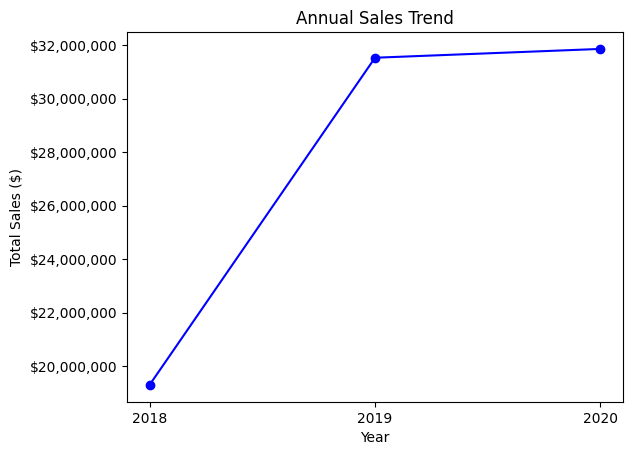

In [ ]:
data['Year'] = data['OrderDate'].dt.year
annual_sales = data.groupby('Year')['Sales'].sum()
plt.plot(annual_sales.index, annual_sales.values, marker='o', linestyle='-', color='b')
plt.xticks(annual_sales.index.astype(int))  # Ensure x-axis ticks are integers
plt.xlabel("Year")
plt.ylabel("Total Sales ($)")
plt.title("Annual Sales Trend")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

plt.show()



Why 2018 is the worst year in Sales ??

ans: This graph Represent the least 10 product sales in 2018

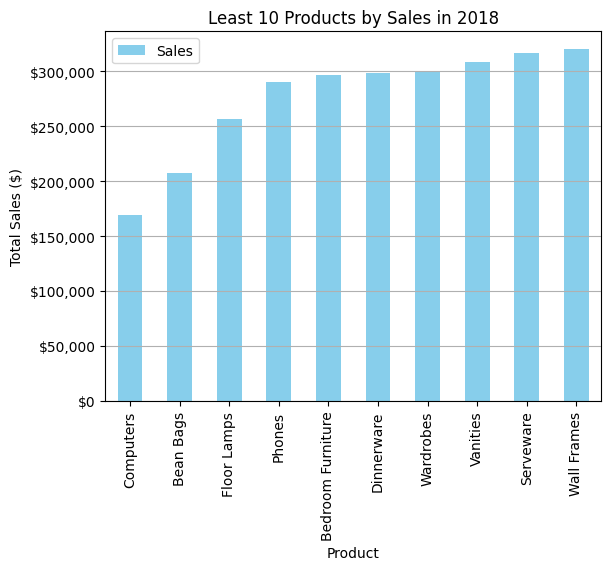

In [ ]:
#@title least 10 products in 2018
df_2018 = data[data['OrderDate'].dt.year == 2018]

# Group by 'Product' and calculate the sum of 'Sales' for each product in 2018
product_sales_2018 = df_2018.groupby('Product')['Sales'].sum().reset_index()

# Sort by sales in ascending order and select the least 10 products
least_10_products = product_sales_2018.sort_values(by='Sales').head(10)

# Plotting a bar chart to show the least 10 products by sales in 2018
fig, ax = plt.subplots()
least_10_products.plot(kind='bar', x='Product', y='Sales', ax=ax, color='skyblue')
ax.set_xlabel("Product")
ax.set_ylabel("Total Sales ($)")
ax.set_title("Least 10 Products by Sales in 2018")
ax.grid(axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

plt.show()


Why 2020 is the best year in sales ??

ans : This graph Represent the best 10 products sales in 2020

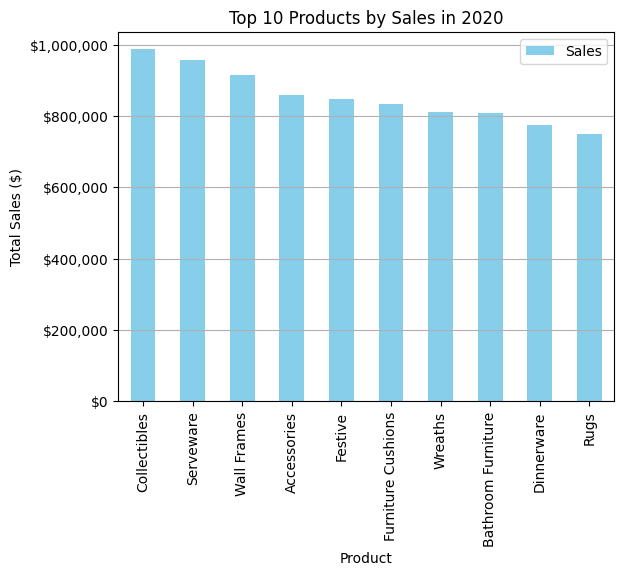

In [ ]:
#@title best 10 products in 2020
df_2020 = data[data['OrderDate'].dt.year == 2020]

# Group by 'Product' and calculate the sum of 'Sales' for each product in 2020
product_sales_2020 = df_2020.groupby('Product')['Sales'].sum().reset_index()

# Sort by sales in descending order and select the top 10 products
top_10_products = product_sales_2020.sort_values(by='Sales', ascending=False).head(10)

# Plotting a bar chart to show the top 10 products by sales in 2020
fig, ax = plt.subplots()
top_10_products.plot(kind='bar', x='Product', y='Sales', ax=ax, color='skyblue')
ax.set_xlabel("Product")
ax.set_ylabel("Total Sales ($)")
ax.set_title("Top 10 Products by Sales in 2020")
ax.grid(axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

plt.show()


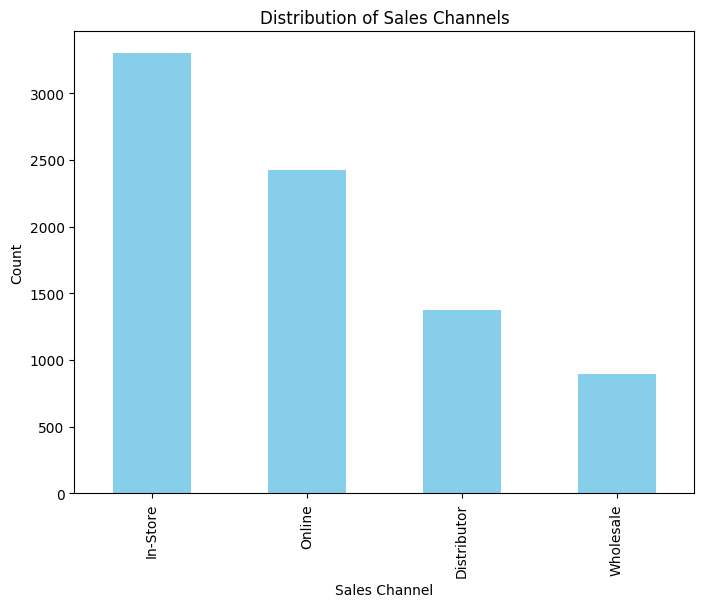

In [ ]:
#@title Check SALES CHANNELS
plt.figure(figsize=(8, 6))
data["Sales Channel"].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Distribution of Sales Channels')
plt.show()


What is the best channel in sales??

ans : IN-Store is the best Channel in sales

<ipython-input-68-b32969bbf692>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_sales=data.groupby("Sales Channel").sum()["Sales"]


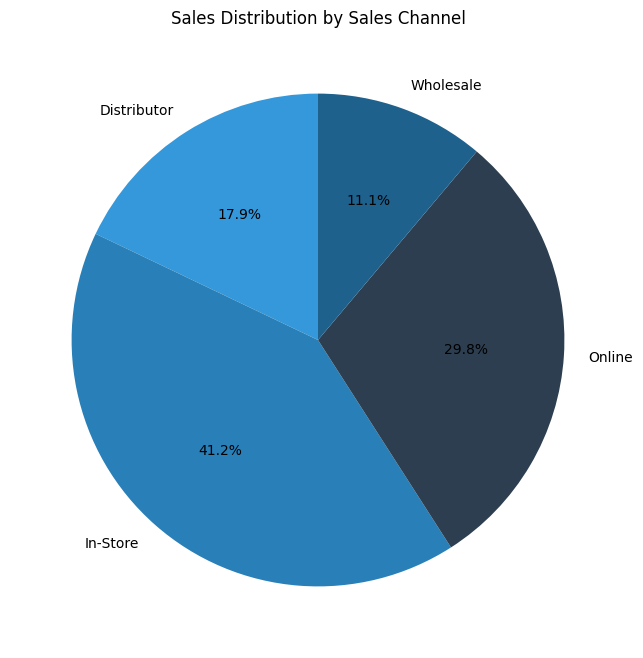

In [ ]:
annual_sales=data.groupby("Sales Channel").sum()["Sales"]
#@title Sales by each channel
colors = ['#3498db', '#2980b9', '#2c3e50', '#1f618d']

# Plotting a pie chart with a custom color palette
plt.figure(figsize=(8, 8))
plt.pie(annual_sales, labels=annual_sales.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sales Distribution by Sales Channel')
plt.show()


What is the best Team in sales??

ans : Donald Reynolds is the best Team

<ipython-input-51-2fa21f3f10cf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_sales=data.groupby("Sales Team").sum()["Sales"]


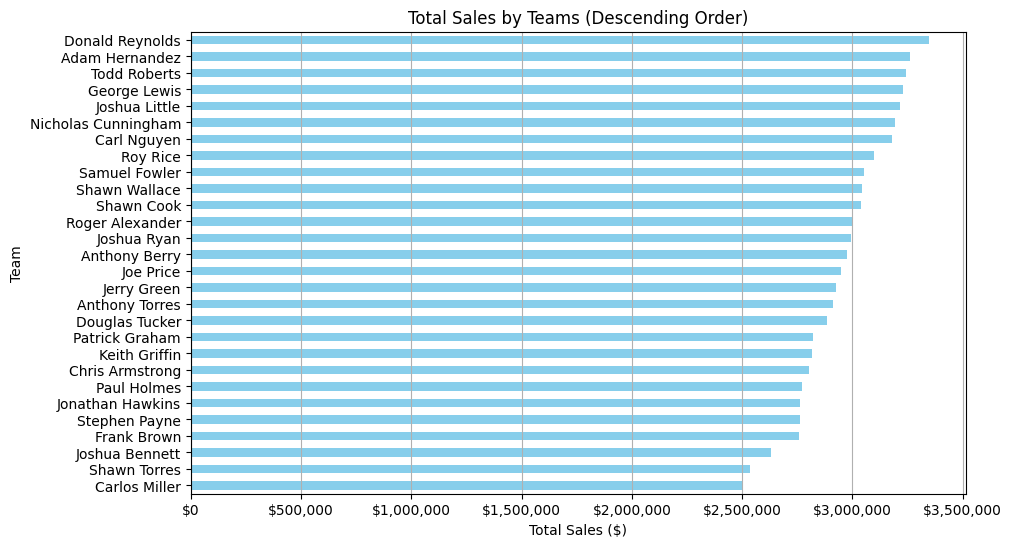

In [ ]:
annual_sales=data.groupby("Sales Team").sum()["Sales"]
#@title Sales by each Team
annual_sales = annual_sales.sort_values(ascending=True)

# Plotting a horizontal bar chart with a larger figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Set the size of the figure
annual_sales.plot(kind='barh', color='skyblue', ax=ax)
ax.set_xlabel("Total Sales ($)")
ax.set_ylabel("Team")
ax.set_title("Total Sales by Teams (Descending Order)")
ax.grid(axis='x')

# Format x-axis to display real numbers without scientific notation
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

plt.show()


what is the best Region in sales ??

ans : West is the best , Then South

<ipython-input-33-6d4b2fe1e189>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_sales=data.groupby("REGION").sum()["Sales"]


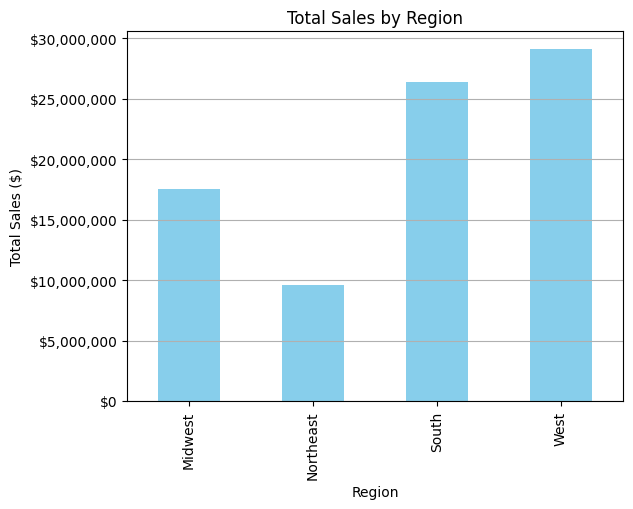

In [ ]:
annual_sales=data.groupby("REGION").sum()["Sales"]
#@title Sales by each Region
annual_sales.plot(kind='bar', color='skyblue')
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by Region")
plt.grid(axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

plt.show()


WHAT IS best product groupped by profit and cost??

ans: Baseball is the best product.


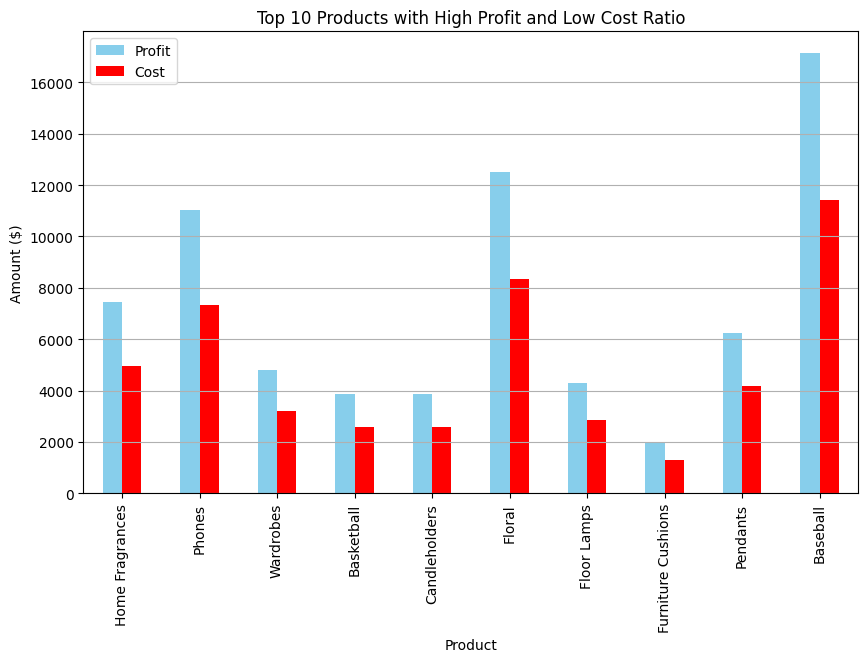

In [ ]:
data['Profit_to_Cost_Ratio'] = data['Profit'] / data['Total cost']

# Sort by the custom metric in descending order
df_sorted = data.sort_values(by='Profit_to_Cost_Ratio', ascending=False)

# Select the top 10 products
top_10_products = df_sorted.head(10)

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
top_10_products.plot(kind='bar', x='Product', y=['Profit', 'Total cost'], ax=ax, color=['skyblue', 'red'])
ax.set_xlabel("Product")
ax.set_ylabel("Amount ($)")
ax.set_title("Top 10 Products with High Profit and Low Cost Ratio")
ax.legend(["Profit", "Cost"])
ax.grid(axis='y')

plt.show()
